In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
cancer_data = pd.read_csv("https://drive.google.com/uc?export=download&id=1LCjSrmA4BhOQ9_diXLDSbp4mIejVrlh7")

In [3]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_data[9:12]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,NaN
11,84610002,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,NaN


In [5]:
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
cancer_data.shape

(569, 33)

In [7]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


HANDLING THE MISSING


In [9]:
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'], axis=1, errors='ignore')

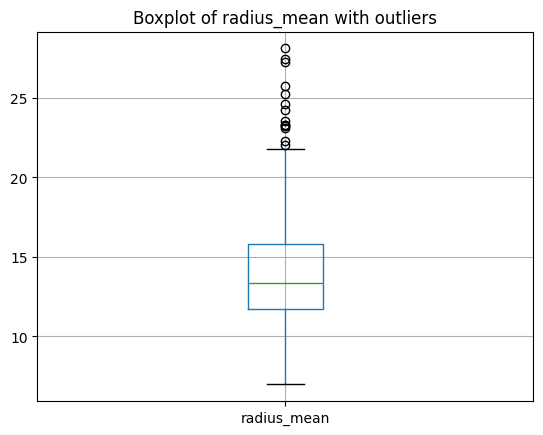

In [10]:
cancer_data.boxplot(column=['radius_mean'])
plt.title("Boxplot of radius_mean with outliers")
plt.show()


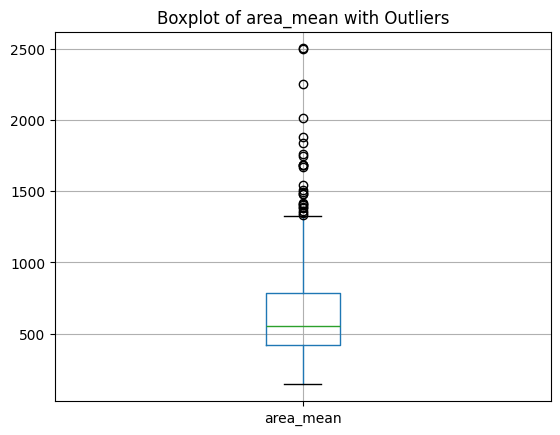

In [11]:
cancer_data.boxplot(column=['area_mean'])
plt.title("Boxplot of area_mean with Outliers")
plt.show()


In [12]:
cancer_data['radius_mean'].fillna(cancer_data['radius_mean'].median(), inplace=True)
cancer_data['area_mean'].fillna(cancer_data['area_mean'].median(), inplace=True)

/tmp/ipython-input-2862538610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_data['radius_mean'].fillna(cancer_data['radius_mean'].median(), inplace=True)
/tmp/ipython-input-2862538610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [13]:
cancer_data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [14]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
cancer_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [16]:
cancer_data['radius_category'] = pd.cut(
    cancer_data['radius_mean'],
    bins=[0, cancer_data['radius_mean'].median(), cancer_data['radius_mean'].max()],
    labels=['kecil', 'besar']
)

cancer_data['radius_category'].value_counts()


,count
radius_category,
kecil,285
besar,284


In [17]:
cancer_data['area_category'] = pd.cut(
    cancer_data['area_mean'],
    bins=[0,
          cancer_data['area_mean'].quantile(0.33),
          cancer_data['area_mean'].quantile(0.66),
          cancer_data['area_mean'].max()],
    labels=['kecil', 'sedang', 'besar']
)

cancer_data['area_category'].value_counts()


,count
area_category,
besar,194
kecil,188
sedang,187


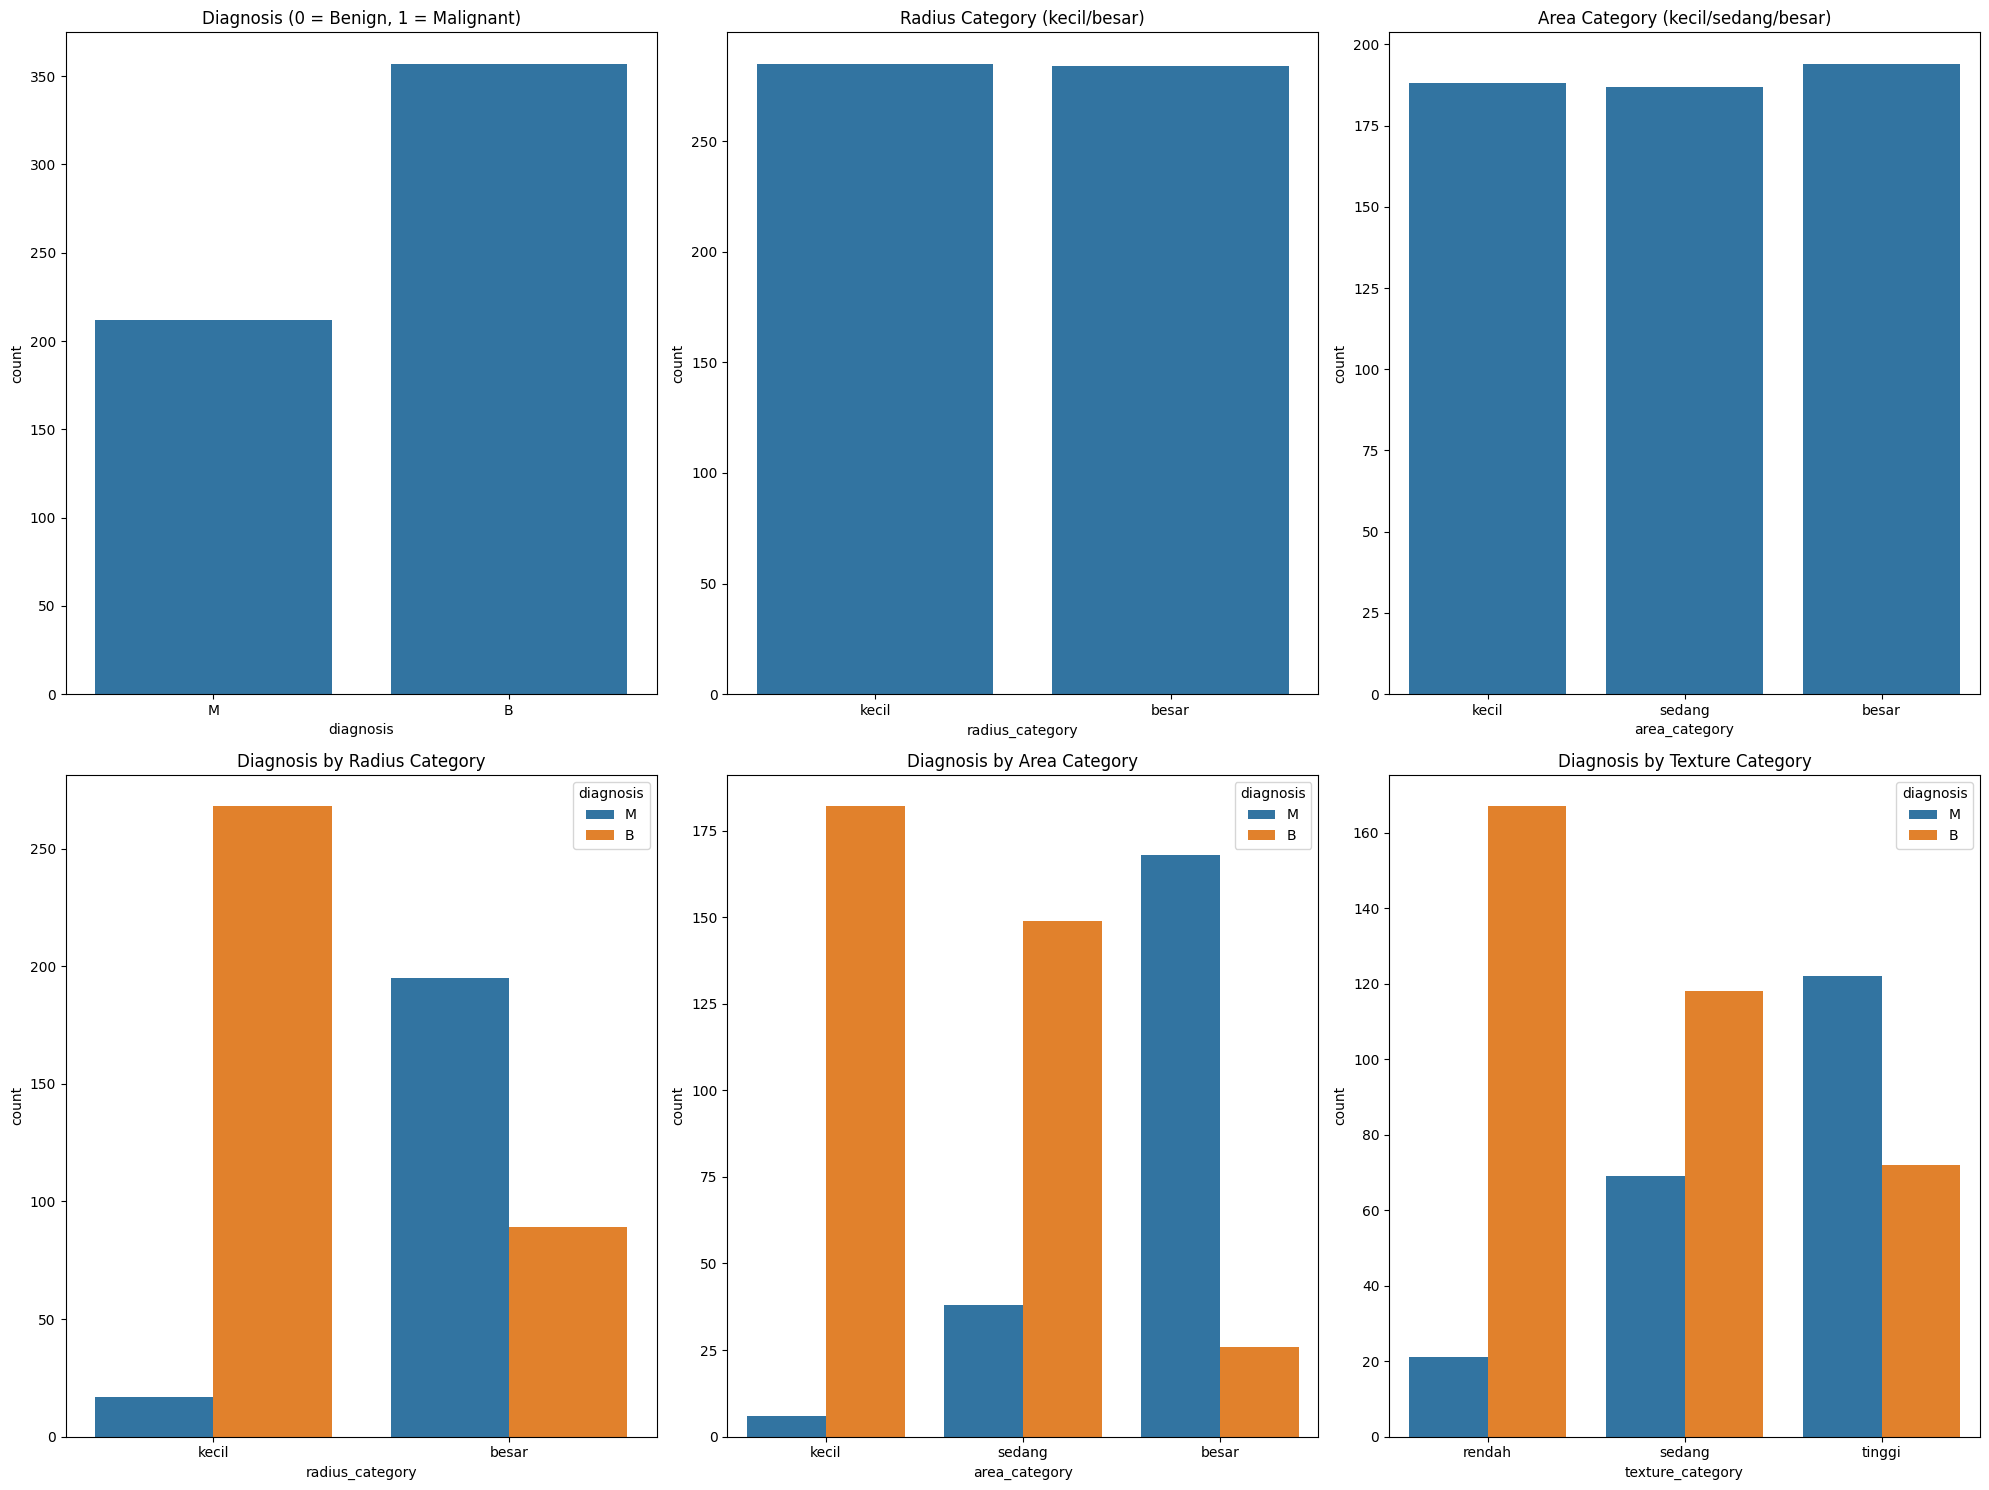

In [18]:
cancer_data['texture_category'] = pd.cut(
    cancer_data['texture_mean'],
    bins=[0,
          cancer_data['texture_mean'].quantile(0.33),
          cancer_data['texture_mean'].quantile(0.66),
          cancer_data['texture_mean'].max()],
    labels=['rendah', 'sedang', 'tinggi']
)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# 1. diagnosis (pengganti Survived)
sns.countplot(x='diagnosis', data=cancer_data, ax=axes[0])
axes[0].set_title('Diagnosis (0 = Benign, 1 = Malignant)')

# 2. radius_category (pengganti Sex)
sns.countplot(x='radius_category', data=cancer_data, ax=axes[1])
axes[1].set_title('Radius Category (kecil/besar)')

# 3. area_category (pengganti Pclass)
sns.countplot(x='area_category', data=cancer_data, ax=axes[2])
axes[2].set_title('Area Category (kecil/sedang/besar)')

# 4. radius_category vs diagnosis (pengganti Sex vs Survived)
sns.countplot(x='radius_category', hue='diagnosis', data=cancer_data, ax=axes[3])
axes[3].set_title('Diagnosis by Radius Category')

# 5. area_category vs diagnosis (pengganti Pclass vs Survived)
sns.countplot(x='area_category', hue='diagnosis', data=cancer_data, ax=axes[4])
axes[4].set_title('Diagnosis by Area Category')

# 6. texture_category vs diagnosis (pengganti Embarked vs Survived)
sns.countplot(x='texture_category', hue='diagnosis', data=cancer_data, ax=axes[5])
axes[5].set_title('Diagnosis by Texture Category')

plt.tight_layout()
plt.show()

In [19]:
replacements = {
    'diagnosis': {'M': 1, 'B': 0}
}

cancer_data.replace(replacements, inplace=True)


/tmp/ipython-input-892735196.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_data.replace(replacements, inplace=True)


In [20]:
cancer_data.iloc[0:9]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_category,area_category,texture_category
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,besar,besar,rendah
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,besar,besar,sedang
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,besar,besar,tinggi
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,kecil,kecil,sedang
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,besar,besar,rendah
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,kecil,sedang,rendah
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,besar,besar,sedang
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,besar,sedang,tinggi
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,kecil,sedang,tinggi


In [21]:
X = cancer_data.drop(columns=['diagnosis'])
Y = cancer_data['diagnosis']

# Identify categorical columns to be one-hot encoded
categorical_cols = ['radius_category', 'area_category', 'texture_category']

# Apply one-hot encoding to the entire X DataFrame and convert to int
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True).astype(int)

In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_category_besar,area_category_sedang,area_category_besar,texture_category_sedang,texture_category_tinggi
0,17,10,122,1001,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,20,17,132,1326,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,19,21,130,1203,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,11,20,77,386,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20,14,135,1297,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(569, 35) (455, 35) (114, 35)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [28]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [29]:
print("Training Accuracy (NB): ", accuracy_score(y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(y_test, test_pred_nb))

Training Accuracy (NB):  0.8945054945054945
Testing Accuracy (NB):  0.956140350877193


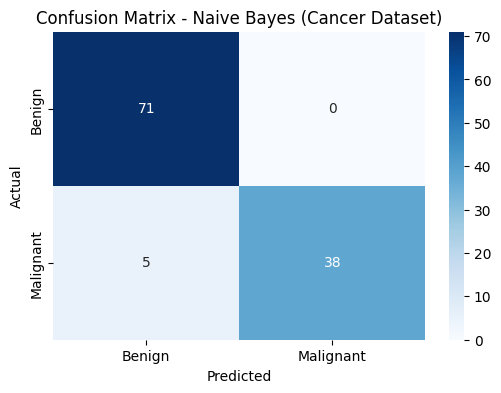

In [30]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title("Confusion Matrix - Naive Bayes (Cancer Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
print("\nClassification Report (NB):")
print(classification_report(y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [32]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("STD Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores [0.84210526 0.90350877 0.90350877 0.94736842 0.92035398]
Mean Accuracy: 0.903369042074212
STD Deviation: 0.03457664877041366
